# Regresión Lineal: costo de un incidente de seguridad
En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al número de equipos que se han visto afectado. EL conjunto de datos es generado de manera aleatoria

# 1.- Generacion del DataSet

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del DataSet es:", len(X))

La longitud del DataSet es: 100


# 2.- Visualización del DataSet

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

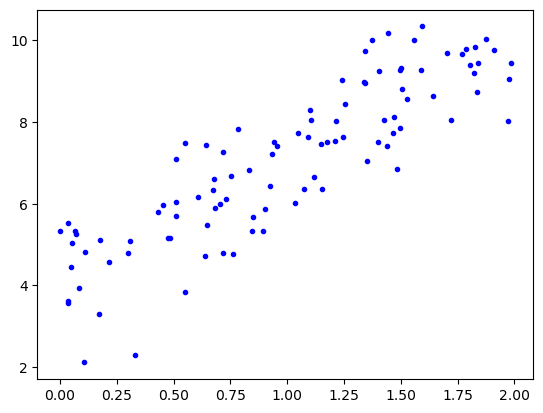

In [6]:
plt.plot(X, y, "b.") #b. pinta los puntos de color azul
plt.show()

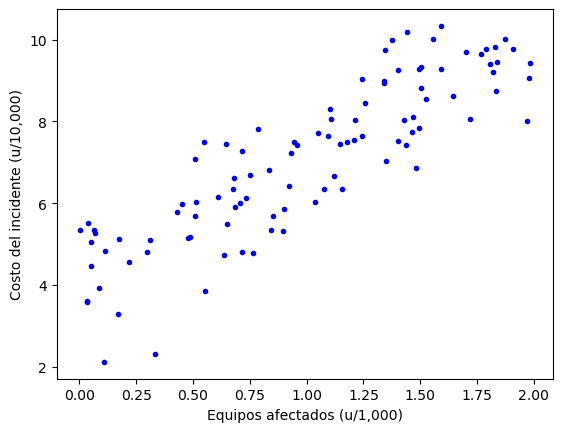

In [7]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

# 3.- Modificación del DataSet

In [9]:
import pandas as pd

In [10]:
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()} #Ajustamos la función a X
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,1.821779,9.206040
1,0.215763,4.566548
2,1.075071,6.355213
3,1.036261,6.025487
4,1.525580,8.555133
5,0.170367,3.297621
6,0.110321,4.829940
7,0.035010,3.579458
8,0.331700,2.303738
9,1.503572,8.809186


In [11]:
# Escalado del Número de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')# Convertimos a enteros
# Escalado del costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,1821,92060
1,215,45665
2,1075,63552
3,1036,60254
4,1525,85551
5,170,32976
6,110,48299
7,35,35794
8,331,23037
9,1503,88091


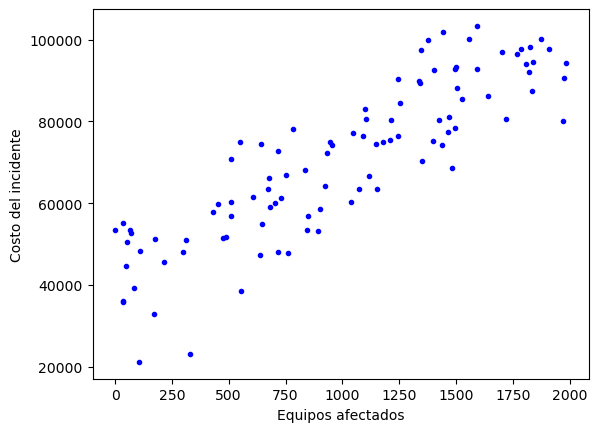

In [12]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b." )
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

# 4.- Construcción del Modelo

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# Construccion del modelo y ajuste de la funcion de hipotesis
lin_reg = LinearRegression()
lin_reg.fit (df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [16]:
# Parámetro Tetha 0
lin_reg.intercept_

41085.50015768847

In [17]:
# Parámetro Tetha 1
lin_reg.coef_

array([29.52264796])

In [18]:
# Prediccion para el valor minimo y maximo para el conjunto de datos de entrenamiento
X_min_max = np.array([[df['No_Equipos_Afectados'].min()], [df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(X_min_max)

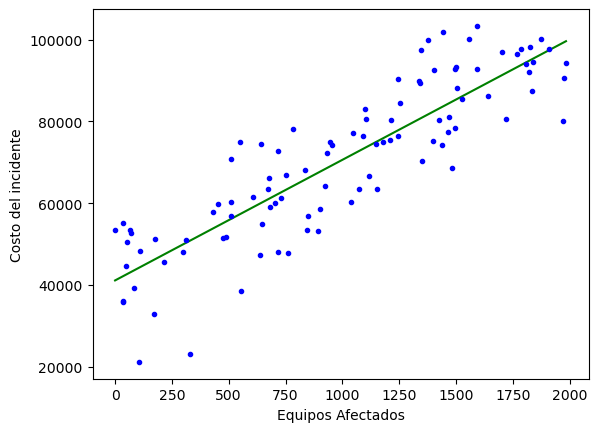

In [19]:
# Representación gráfica de la funcion hipotesis generada.
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel('Equipos Afectados')
plt.ylabel('Costo del incidente')
plt.show()

# 5.- Predicción de nuevos ejemplos

In [21]:
x_new = np.array([[2700]]) # Número de equipos afectados.
# Predicción del costo que tendría el incidente
Costo = lin_reg.predict(x_new)
print('El costo del incidente seria: $ ', int(Costo[0]))

El costo del incidente seria: $  120796


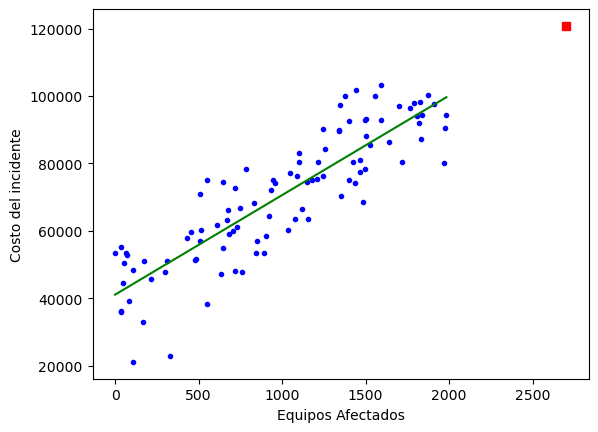

In [22]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], 'b.')
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(x_new, Costo, 'rs')
plt.xlabel('Equipos Afectados')
plt.ylabel('Costo del incidente')
plt.show()